# Assignment Seven
---
Oisín Morrison - 12/02/20 - Hw7.ipynb

---

This assignment is in relation to the analysis of astronomical data.

In [25]:
#standard imports for data science with python
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import scipy
import sklearn
import sklearn.cluster as cluster

pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)

## Task 1
Read in the data from the given file into 5 arrays.

Note: I am going to use a pandas.DataFrame for this since it is optimised for these sort of tasks. Each row/column in such a DataFrame is a numpy array so I will be creating five columns (arrays) to receive the data as asked to do, however I will use a list-map-lambda expression instead of a for loop to do so.

To do this, I shall:
- Open the file and split and format the data correctly using a list-map-lambda expression.
- Make use of Python's data science library Pandas' DataFrame feature to store the data and rename the columns etc.

Note: No units given with data so I shall no be labelling units on plots etc.

In [26]:
#read data into dataframe
data=pd.DataFrame(list(map(lambda x: x.split(), open('StarData.txt', 'r').readlines())))
#format the dataframe
data=data.dropna().reset_index().drop('index', 1).rename(columns={0:'StarID', 1:'m_V', 2:'m_B-m_V', 3:'Parallax', 4:'Parallax Uncertainty'}).astype('float')
#show
data.head()

,StarID,m_V,m_B-m_V,Parallax,Parallax Uncertainty
0,2.0,4.61,1.04,0.0135,149.0
1,3.0,8.45,1.05,0.0717,113.0
2,4.0,9.01,1.44,0.0886,23.0
3,6.0,8.60,0.94,0.0147,55.0
4,7.0,5.96,0.67,0.0455,50.0


## Task 2
Plot a colour-magnitude diagram i.e. $m_v$ on the y-axis and $m_b-m_v$ on the x-axis.

To do this, I shall simply:
- Plot the graph using seaborn.scatterplot.
- Then plot it again using matplotlib.pyplot.scatter for comparison.

[Text(0.5, 1.0, 'Colour-Magnitude Diagram')]

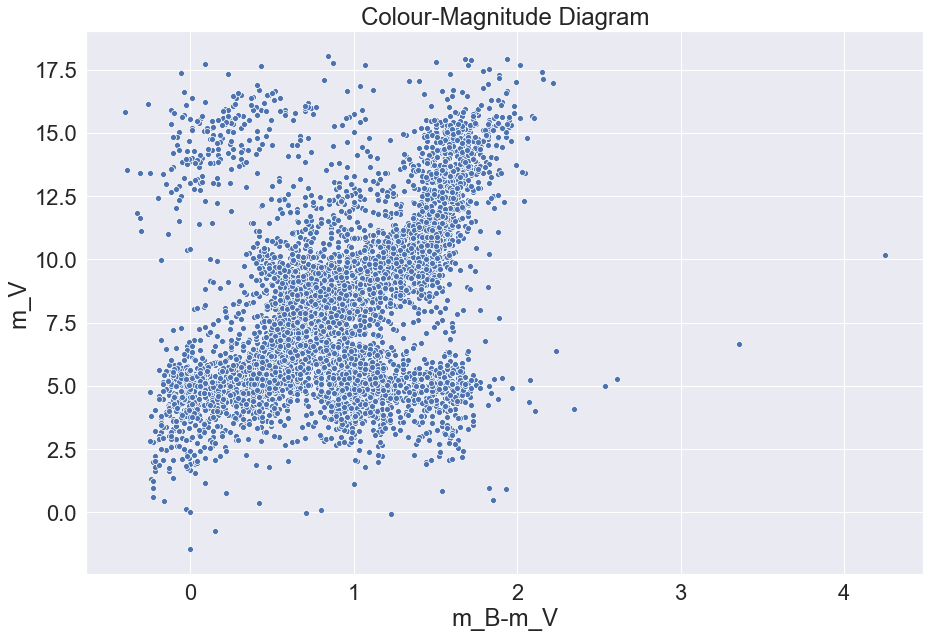

In [27]:
sns.set(font_scale=2) #have font match figure size
fig, ax = plt.subplots(figsize=(15,10)) #initialise plot as normal
sns.scatterplot(x='m_B-m_V', y='m_V', data=data, ax=ax) #plotting
ax.set(title="Colour-Magnitude Diagram") #title

I think that looks quite well. I'll plot it with matplotlib.pyplot.scatter next and have the marker size decrease so we don't have any overlap of points.

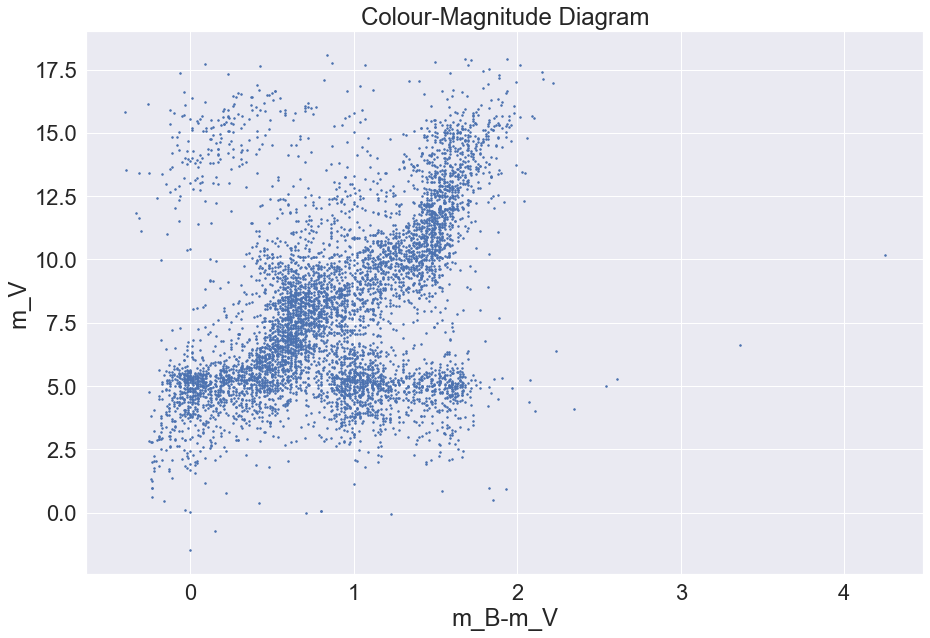

In [28]:
fig, ax = plt.subplots(figsize=(15,10)) #initialise plot as normal
mpl.rcParams.update({'font.size':15}) #make font bigger to match figsize
mpl.rcParams['lines.markersize']=1.5 #make marker smaller
ax.set(xlabel='m_B-m_V',ylabel= 'm_V', title="Colour-Magnitude Diagram") #labels
plt.scatter(data['m_B-m_V'], data['m_V']) #plot

We were told to experiment with marker symbols and sizes for the scatter plot. I think I have a suitable marker size and frankly I see no reason at all to change my marker symbol - anything other than a dot for a point will simply distract from the data from presented and I feel that it undesirable in its entirety. As such, I am content to leave this graph as is.

## Task 3
Calculate the absolute magnitude, $M$, for each of the stars. We are given that:
$$m-M=5 \operatorname{log}\left(\frac{d}{10}\right)$$
where $m$ is the apparent magnitude and $d=\frac{1}{p}$, where $p$ is the parallax.
Replot the colour-magnitude diagram using absolute magnitudes. Then add some code to count the number of red giant, main sequence and white dwarf stars on your diagram and determine the approximate percentage of each type.


This task consists of two easy sections will I will implemented simply by:
- Making use of numpy array properties to calculate $M$ for each data entry.
- Replot my diagram from before using $M$ instead of $m$ this time.

and a challenging third section involving the counting of number of red giant, main sequence and white dwarf stars on your diagram and determination of the approximate percentage of each type. There a few ways I could implement this task which I shall quickly list
1. I myself can label a large number of these points from my background knowledge of the shape of the graph and the regions in it. These would constitute a large enough training dataset for me to train a model in tensorflow. I could then have the model label the rest of the points and work from there.
2. I could specify the regions with two functions: one for the upper limit, $\operatorname{f}(x)$, and one for the lower limit, $\operatorname{g}(x)$. I could then simply check what points lie in the region by taking the x co-ordinate of each point, computing $\operatorname{f}(x)$ and $\operatorname{g}(x)$ and then checking whether the y co-ordinate $y$ satisfies $\operatorname{g}(x) \leq y \leq \operatorname{f}(x)$.
3. We can note that the main belt is virtually a straight line. So if I were to rotate the graph so that it lay on the x-axis we could distinguish between the main regions quite easily.
4. We can employ clustering machine learning algorithms to cluster the data for us.

I think 2. would be easiest to implement. Ideally, I would love to do 1. since I am interested in learning machine learning techniques. but I don't have time to do so - I may come back and try it later. As a sort of compromise, I will try a variation on 4. I had some issues with this which I have left in to demonstrate. I shall detail the process I went through.
- Firstly I simply tried a naive implementation of scikit-learn's various clustering models.
- This had issues so I was faced with two options:
    - Train the model.
    - Use 3.


Training the model would have been better but unfortunately I did not have time to label the data, so I decided to use 3. I then decided that the following actions would be best to implement:
- Rotate the graph such that the main sequence lies approximately on the x-axis. This will be my starting point.
- Using exponentiation properties and a clustering model, I shall group the white dwarves together.
- By scaling our y-axis and using a clustering model again, I shall identify the main belt.
- Plotting my graph, I shall determine how to identify red giants from the region of giants and supergiants.
- I shall then finally get an estimate for the number of red giant, main sequence and white dwarf stars and the corresponding percentages.


In [29]:
data['M_V']=data['m_V']-5*np.log(1/(data['Parallax']))/np.log(10) #calculate the absolute magnitude

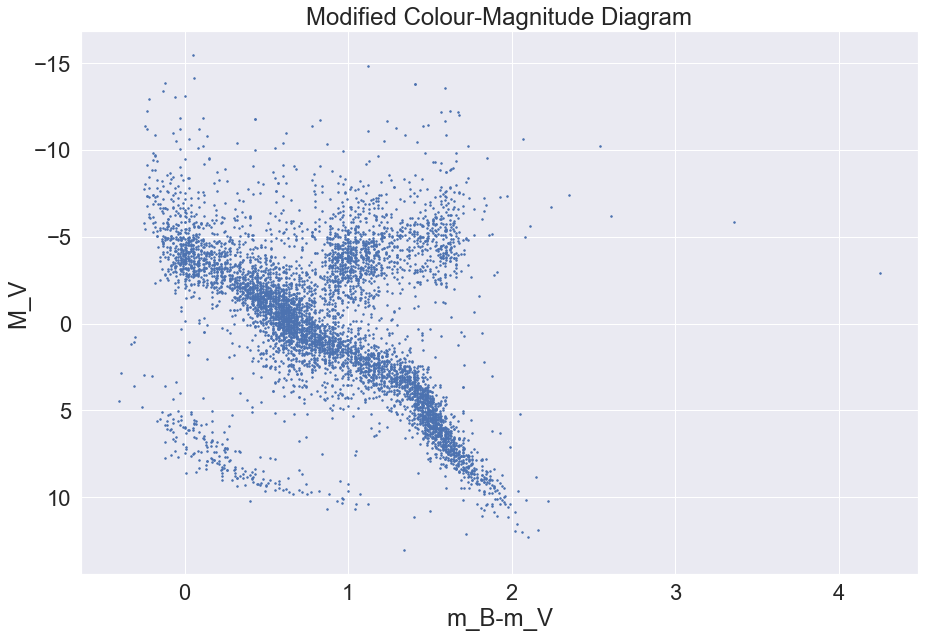

In [30]:
fig, ax = plt.subplots(figsize=(15,10)) #initialise plot as normal
mpl.rcParams.update({'font.size':15}) #make font bigger to match figsize
mpl.rcParams['lines.markersize']=1.5 #maker size same as before
ax.set(xlabel='m_B-m_V',ylabel= 'M_V', title="Modified Colour-Magnitude Diagram") #plot absolute magnitude this time
ax.scatter(data['m_B-m_V'], data['M_V']) #plot
plt.gca().invert_yaxis() #invert the y-axis

That concludes the first two parts. Now, to identify the number of red giant, main sequence and white dwarf stars on your diagram and determine the approximate percentage of each type. I firstly naively tried to do this simply using an untrained scikit-learn model.

In [31]:
clustering = cluster.KMeans(n_clusters=3) #model
test=clustering.fit_predict(data[['m_B-m_V', 'M_V']]) #predict using model
data['Cluster']=test #add data to dataframe

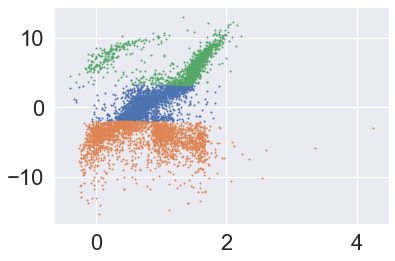

In [32]:
#plot the model (for me to see if it works, not presenting this so no labels)

mpl.rcParams['lines.markersize']=1

d1=data.loc[data["Cluster"]==0]
d2=data.loc[data["Cluster"]==1]
d3=data.loc[data["Cluster"]==2]

plt.scatter(d1['m_B-m_V'], d1['M_V'])
plt.scatter(d2['m_B-m_V'], d2['M_V'])
plt.scatter(d3['m_B-m_V'], d3['M_V'])

This is clearly an awful fit. Let's try a different model.

In [33]:
clustering = cluster.SpectralClustering(n_clusters=3) #new model
test=clustering.fit_predict(data[['m_B-m_V', 'M_V']]) #predict as before
data['Cluster']=test #overwrite data in dataframe

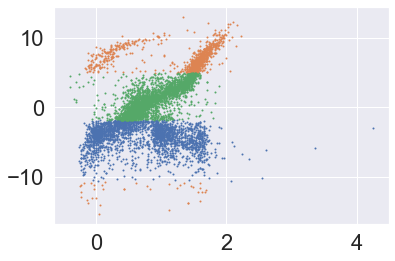

In [34]:
#plot the new model (for me to see if it works, not presenting this so no labels)

mpl.rcParams['lines.markersize']=1

d1=data.loc[data["Cluster"]==0]
d2=data.loc[data["Cluster"]==1]
d3=data.loc[data["Cluster"]==2]

plt.scatter(d1['m_B-m_V'], d1['M_V'])
plt.scatter(d2['m_B-m_V'], d2['M_V'])
plt.scatter(d3['m_B-m_V'], d3['M_V'])

It's still awful. Need to change technique. I note that the main sequence is roughly a straight line. I'll try rotating the graph such that it is on the x-axis.

In [35]:
def rotate(x, y, angle, pivot):
    """Rotates a given point by a given angle around a given pivot point"""
    x -= pivot[0];
    y -= pivot[1];
    qx=x*np.cos(angle)-y*np.sin(angle)
    qy=x*np.sin(angle)+y*np.cos(angle)
    return qx+pivot[0], qy+pivot[1]

In [36]:
rotated=pd.DataFrame(rotate(data['m_B-m_V'],data['M_V'], -30/180*np.pi, [0, 0])).T #rotate by -30 degrees
data['Rotated_m_B-m_V'], data['Rotated_M_V'] = rotated[0], rotated[1] #add to dataframe

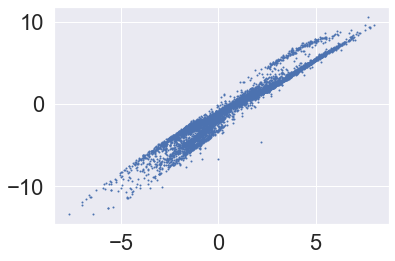

In [37]:
#plot
plt.scatter(data['Rotated_m_B-m_V'], data['Rotated_M_V'])

Still need some more rotation.

In [38]:
rotated=pd.DataFrame(rotate(data['Rotated_m_B-m_V'],data['Rotated_M_V'], -53/180*np.pi, [0, 0])).T #rotate again
data['NRotated_m_B-m_V'], data['NRotated_M_V'] = rotated[0], rotated[1] #add to dataframe

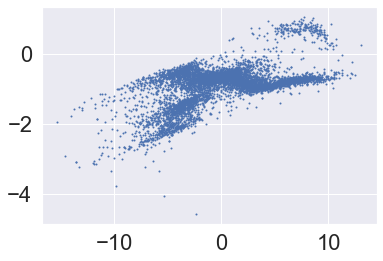

In [39]:
#plot
plt.scatter(data['NRotated_m_B-m_V'], data['NRotated_M_V'])

That looks the right rotation to me. I shall now make use of exponentiation properties to cluster the white dwarf group i.e. point up top will be clustered together since exponentials grow fast.

In [40]:
data['NRotated_M_V_MOD']=4.6**(data['NRotated_M_V']+1.1)*1.5 #exponentiate data

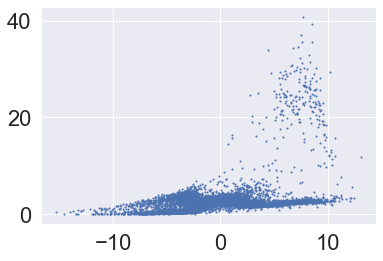

In [41]:
#plot to see if it looks OK
plt.scatter(data['NRotated_m_B-m_V'], data['NRotated_M_V_MOD'])
#it does

In [42]:
clustering = cluster.KMeans(n_clusters=2) #model
test=clustering.fit_predict(data[['NRotated_m_B-m_V', 'NRotated_M_V_MOD']]) #use model

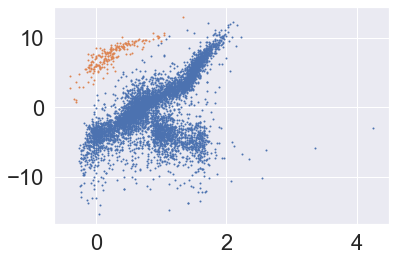

In [43]:
data['NCluster']=test #add to dataframe

#plot
mpl.rcParams['lines.markersize']=1

d1=data.loc[data["NCluster"]==0]
d2=data.loc[data["NCluster"]==1]
d3=data.loc[data["NCluster"]==2]

plt.scatter(d1['m_B-m_V'], d1['M_V'])
plt.scatter(d2['m_B-m_V'], d2['M_V'])
plt.scatter(d3['m_B-m_V'], d3['M_V'])

This has given us our white dwarves. I will now move on to tryng to isolate the main sequence.

I need the clustering to focus primarily on the y-axis position of our rotated data. To do this, I'll simply scale the y-axis as the easiest solution.

In [44]:
data1=data[data['NCluster']==0] #only looking at data that isn't a white dwarf

data1["NRotated_M_V_SCALED"]=15*data['NRotated_M_V'] #scaling y-axis

#adding some initial points for the model
c1=np.array([0.2, -0.2])
c2=np.array([0.2, -1.2])
cluster_centres=np.array([c1, c2])

clustering = cluster.KMeans(n_clusters=2, init=cluster_centres) #model
test=clustering.fit_predict(data1[['NRotated_m_B-m_V', 'NRotated_M_V_SCALED']]) #use model

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


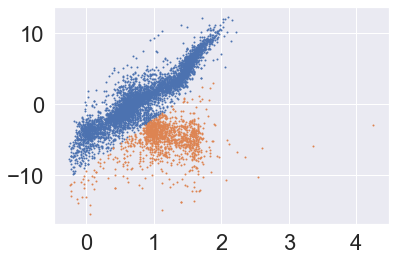

In [45]:
data1['NCluster']=test #store data

#plot
d2=data1.loc[data1["NCluster"]==0]
d3=data1.loc[data1["NCluster"]==1]
plt.scatter(d2['m_B-m_V'], d2['M_V'])
plt.scatter(d3['m_B-m_V'], d3['M_V'])

That looks good to me.

(-0.5, 2.5)

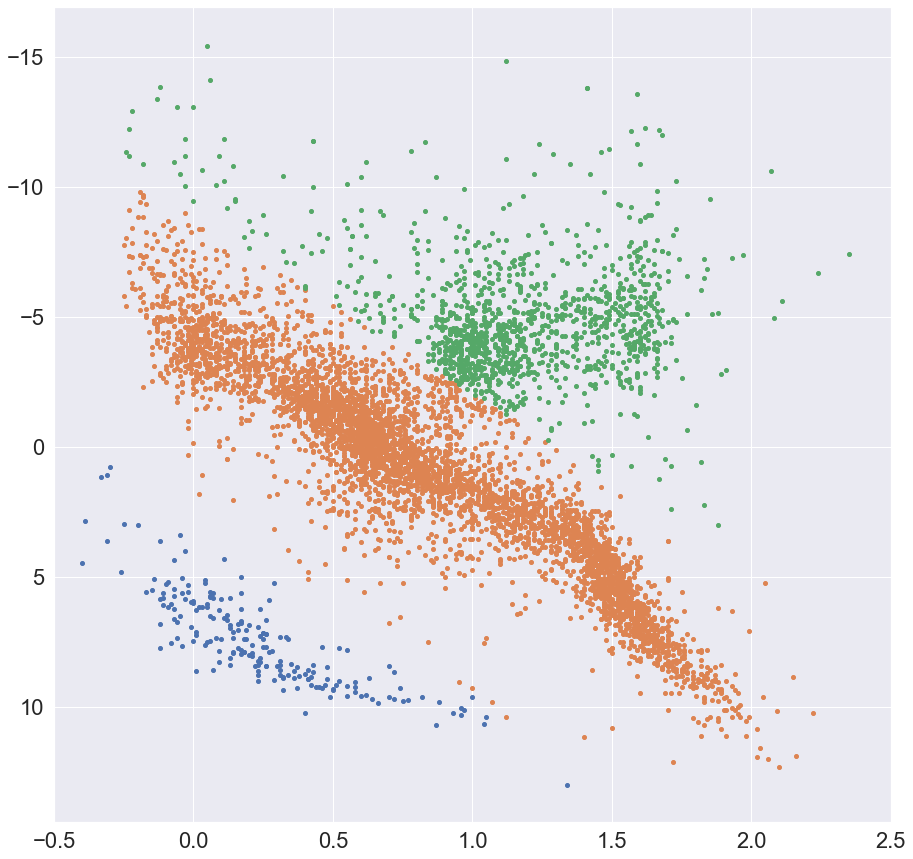

In [46]:
#plot all together
#won't label, will have a proper one later
fig, ax=plt.subplots(figsize=(15,15))
plt.gca().invert_yaxis()
mpl.rcParams['lines.markersize']=4

d1=data.loc[data["NCluster"]==1]
d2=data1.loc[data1["NCluster"]==0]
d3=data1.loc[data1["NCluster"]==1]

ax.scatter(d1['m_B-m_V'], d1['M_V'])
ax.scatter(d2['m_B-m_V'], d2['M_V'])
ax.scatter(d3['m_B-m_V'], d3['M_V'])

ax.set_xlim(-0.5,2.5)

Looking at this graph, I think I have done a good job of isolating the white dwarves and main sequence. I have still to isolate the red giant section from the giants and supergiants. I shall discuss this below now.

The red section of the graph is the region where the colour index is 1.40 or greater. Looking at the background notes for this task, there does not appear to be a cluster of supergiants present on this graph. In fact, the number is so small I will take it to be negligible in my analysis. I feel it is acceptable to do this since the error due to this assumption will be minor compared to the error in correctly clustering the regions. As such, the error I should be focused on minimising should be the error in my clustering technique. Unfortunately, it is difficult and time consuming to do this and since I am simply asked for an approximate value, I feel the current analysis suffices. With these assumptions, it is rather easy to highlight the red giants in the graph.

(-0.5, 2.5)

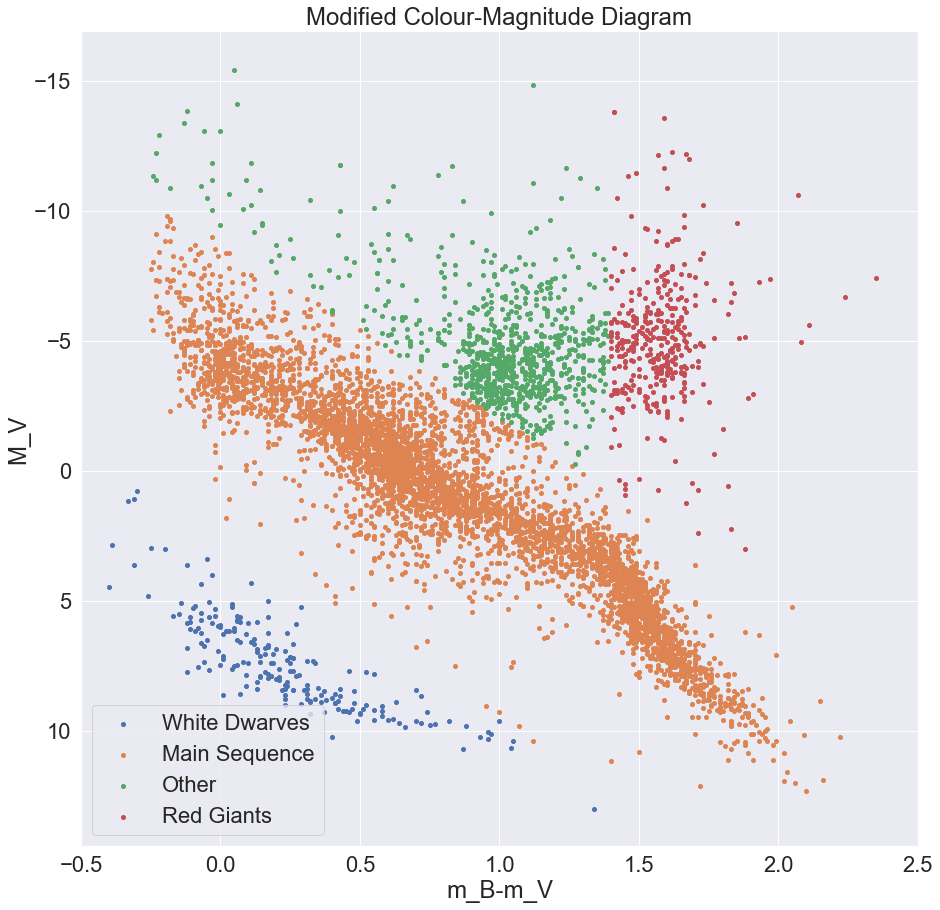

In [47]:
fig, ax=plt.subplots(figsize=(15,15))
plt.gca().invert_yaxis()
mpl.rcParams['lines.markersize']=4

d1=data.loc[data["NCluster"]==1]
d2=data1.loc[data1["NCluster"]==0]
d3=data1.loc[(data1["NCluster"]==1) & (data1["m_B-m_V"]<1.4)]
d4=data1.loc[(data1["NCluster"]==1) & (data1["m_B-m_V"]>=1.4)]

ax.scatter(d1['m_B-m_V'], d1['M_V'], label="White Dwarves")
ax.scatter(d2['m_B-m_V'], d2['M_V'], label="Main Sequence")
ax.scatter(d3['m_B-m_V'], d3['M_V'], label="Other")
ax.scatter(d4['m_B-m_V'], d4['M_V'], label="Red Giants")


ax.set(xlabel='m_B-m_V',ylabel= 'M_V', title="Modified Colour-Magnitude Diagram")
ax.legend()
ax.set_xlim(-0.5,2.5)

We've now got our clusters. We can now get numbers for these very easily.

In [48]:
print("COUNTS")
print("White Dwarves: "+str(d1.shape[0]))
print("Main Sequence: "+str(d2.shape[0]))
print("Red Giants: "+str(d4.shape[0]))
print("Others: "+str(d3.shape[0]))
print("Total: "+str(data.shape[0]))

COUNTS
White Dwarves: 200
Main Sequence: 4766
Red Giants: 371
Others: 883
Total: 6220


In [49]:
print("PERCENTAGES")
print("White Dwarves: "+str(d1.shape[0]/data.shape[0]*100)+"%")
print("Main Sequence: "+str(d2.shape[0]/data.shape[0]*100)+"%")
print("Red Giants: "+str(d4.shape[0]/data.shape[0]*100)+"%")
print("Others: "+str(d3.shape[0]/data.shape[0]*100)+"%")

PERCENTAGES
White Dwarves: 3.215434083601286%
Main Sequence: 76.62379421221866%
Red Giants: 5.964630225080385%
Others: 14.196141479099678%


It is vital to keep uncertainties in mind with these figures. I have almost certainly over-estimated the number in the main sequence judging from the graph, and likely also overestimated the number of red giants. If were to have a tentative guess at bounds, I would say that the number of main sequence stars could be up to 500 lower than my estimate, and the number of red giants up to 50 lower than my estimate. I believe my estimate for the number of white dwarves is very good, and would not expect the uncertainty to even reach double figures. This would put the "Other" category as having up to 560 more than I have estimated. Nonetheless, as an estimate this level suffices to demonstrate the general trends.

## Task 4
Calculate the luminosity, $L$, for each of the stars. We have that a factor of 100 in luminosity increase means that the magnitude increases by 5. We are told the absolute magnitude of the sun is 4.83.

Lastly, use a colormap to show the colours of the stars.


For this task I shall:
- Derive and use a formula to calculate the luminosity of each star.
- Replot my diagram with both luminosity and absolute magnitude.
- Replot once more with a colormap showing the colours of the stars

A factor of 100 in luminosity increase means that the magnitude increases by 5. We are told the absolute magnitude of the sun is 4.83. We now construct a system such that the luminosity of the sun is 1. The fifth root of 100 is about 2.5.

$M-4.83=\log_{2.5}(L)$

There we go. So, we have:
$$L=2.5^{M-4.83}$$

In [50]:
data['Luminosity']=2.5**(data['M_V']-4.83) #calculate luminosity

I had issues with colormaps not being correctly centered later on in this task. Instead of creating a new colormap to fix this which would have been time consuming and unnecessary - especially since this task was only "if time allows", I found some code on https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib detailing how to change the midpoint of a colormap. This solves my issue, so I will make use of it. I want to stress that it is not my work, but I will only use it once.

In [51]:
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero
    
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          0.0 and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = mpl.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

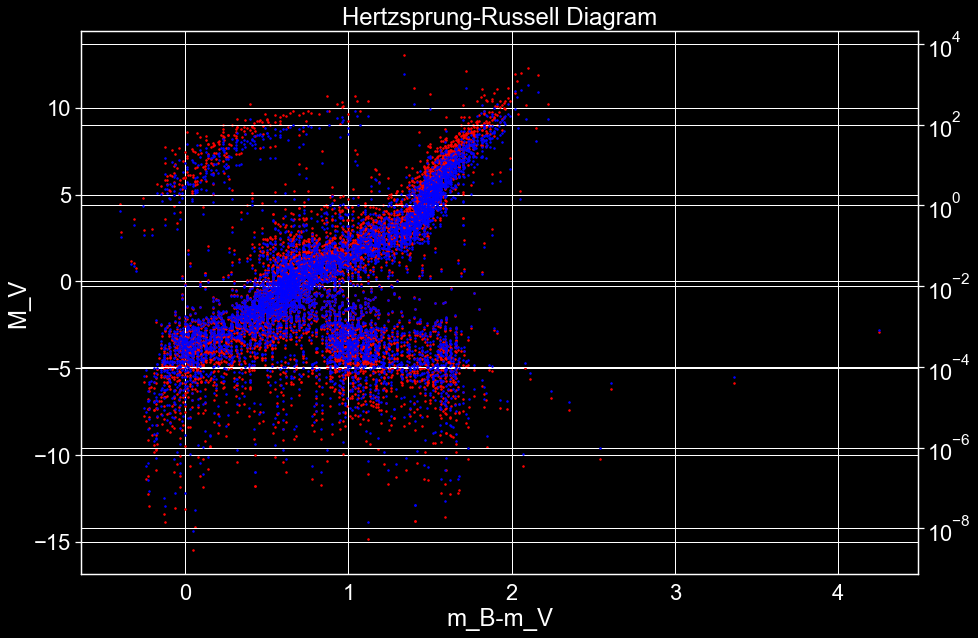

In [59]:
fig, ax = plt.subplots(figsize=(15,10)) #initialise plot as normal
mpl.rcParams.update({'font.size':15}) #make font bigger to match figsize
mpl.rcParams['lines.markersize']=1.5 #make small markers
ax.set(xlabel='m_B-m_V',ylabel= 'M_V', title="Hertzsprung-Russell Diagram") #labels
plt.scatter(data['m_B-m_V'], data['M_V'], color='red') #plot absolute magnitude

ax1 = ax.twinx() #create new axis sharing same x-axis
ax1.set_yscale('log') #log-scale y-axis
ax1.scatter(data['m_B-m_V'], data['Luminosity'], color="blue") #plot luminosity

This graph is messy, so I'll plot luminosity by itself.

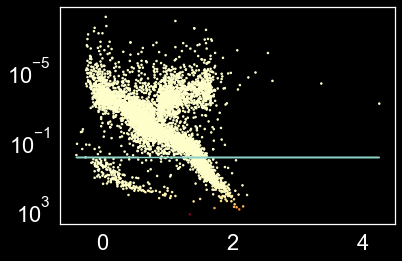

In [56]:
#test graph, I'll detail steps below
plt.grid(False)
plt.style.use("dark_background") 
plt.plot(data['m_B-m_V'], np.ones(len(data['m_B-m_V'])))
cmap = plt.cm.YlOrRd
plt.gca().invert_yaxis()
plt.yscale('log')
lim1=data['Luminosity'].min()
lim2=data['Luminosity'].max()
plt.scatter(data['m_B-m_V'], data['Luminosity'], c=data['Luminosity'], cmap=cmap)

You can see the issue I had with colormaps above. However, I solved it below.

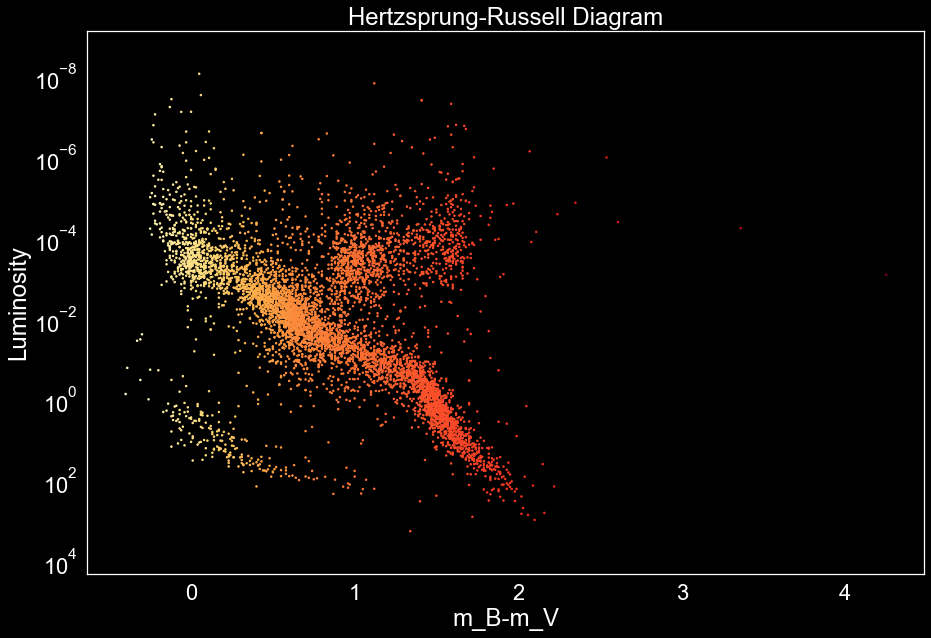

In [61]:
fig, ax = plt.subplots(figsize=(15,10)) #initialise plot as normal
ax.set_yscale('log') #log-scale y-axis
plt.grid(False) #no grid
plt.style.use("dark_background") #dark background for spectral theme
ax.set(xlabel='m_B-m_V',ylabel= 'Luminosity', title="Hertzsprung-Russell Diagram") #labels
plt.gca().invert_yaxis() #invert y-axis
ax.scatter(data['m_B-m_V'], data['Luminosity'], c=data['m_B-m_V'], cmap=shiftedColorMap(cmap, midpoint=0.22)) #plot and use offset colormap

We can see that the red region is indeed approximately the area where $m_B-m_V \ge 1.4$ as discussed before. As such, I am content with this graph and will conclude this assignment here.